In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import matplotlib.dates as mdates

In [2]:
dtype_dict = {'TIME': "object",'TEMPERATURE': "float",'RELATIVE-HUMIDITY': 'float','DEW-POINT':'float'}
df = pd.read_csv("TotalityPythonReady.txt",parse_dates=[0] ,dtype = dtype_dict)

In [3]:
def makeFig(x,y1,y2,y3,labels,xlimit,verticals):
    fig,ax = plt.subplots(figsize=[12,6])

    fig.suptitle("Temperature and Humidity during the Total Solar Eclipse of 2024 in Burlington Vermont")
    
    ln1 = ax.plot(x,y1,label=labels[0],color='red')

    ax.set_ylabel(labels[0])

    ax.legend()
    ax.set_yticks(np.arange(10,36,step=2))
    ax.set_ylim(10,33)
    ax.set_xlim(xlimit)

    for line in verticals:
        ax.axvline(line,color="purple",alpha=0.5)

        ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    
    ax2 = ax.twinx()

    ln2 = ax2.plot(x,y2,label=labels[1],color='green')
    ln3 = ax2.plot(x,y3,label=labels[2],color='blue')

    ax.legend(ln1+ln2+ln3, labels, loc=5)

    ax2.set_ylabel("[%]")
    ax2.set_ylim(0,60)

    ax.grid()

    ax.set_xlabel("Local Time (ET)")

    fig.tight_layout()
    
    return fig

In [4]:
labelNames = ["Temperature [ºC]","Relative Humidity [%]","Dew-Point [%]"]
xlims = [df["TIME"][6000],df["TIME"][13000]]
vertLines = np.array(["2024-04-08 18:14:10","2024-04-08 19:25:59","2024-04-08 19:29:19","2024-04-08 20:37:14"],dtype="datetime64[ns]") - np.timedelta64(4,"h") # First, second, third, and fourth contact

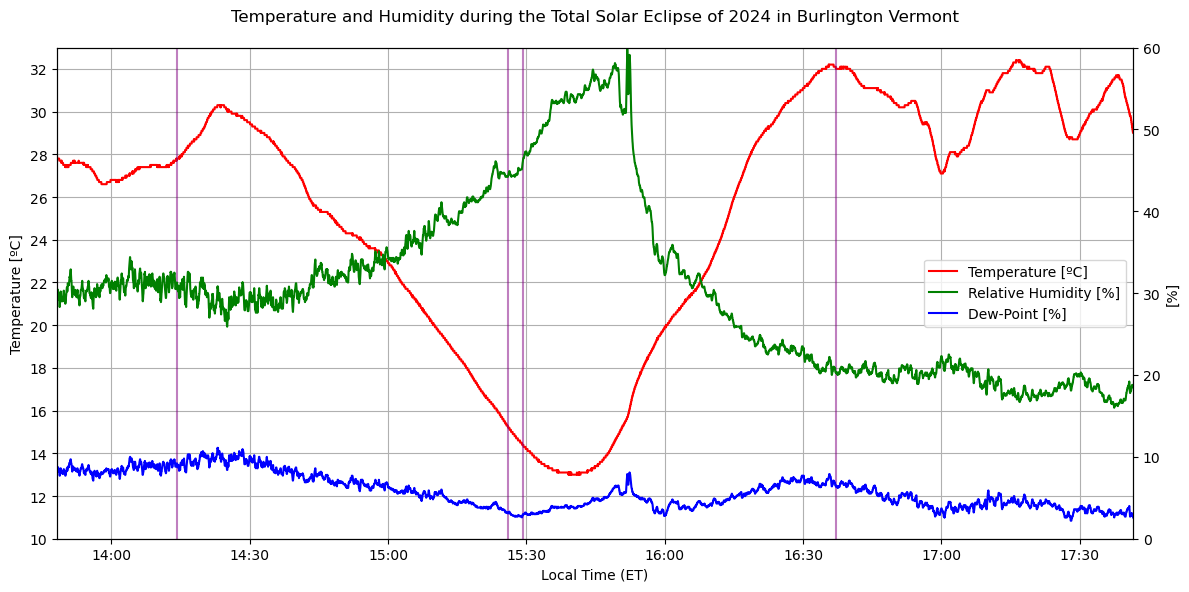

In [5]:
fig = makeFig(df["TIME"],df["TEMPERATURE"],df["RELATIVE-HUMIDITY"],df["DEW-POINT"],labelNames,xlims,vertLines)

In [6]:
fig.savefig("TempHumidityResult.jpg",dpi=180)